In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import math

In [3]:
np.random.seed(100)
N = 500 # number of data points

In [4]:
t = np.linspace(0, 4*np.pi, N)
# t = t/(max(t))
data = 15.0*np.sin(t+0.001) + 0.05 + np.random.randn(N) # create artificial data with noise
# data = 3.0*np.sin(t+100) 

In [5]:
df= pd.DataFrame({'X1':t, 'Y':data})

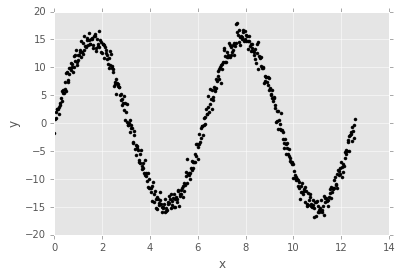

In [6]:
def plot_data(data =df):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data()

In [7]:
def polynomial_data(data, power =1):
    tmp_df = pd.DataFrame()
    col_degree = ['X'+str(i) for i in range(1,power+1)]
    
    for i in range(1,power+1):
        tmp_df[col_degree[i-1]]=df['X1']**i
        
    return tmp_df

In [33]:
#5 degree polynomial
# df_poly = pd.concat([polynomial_data(df,5), df['Y']], axis=1)

In [60]:
#n degree polynomial
df_poly = pd.concat([polynomial_data(df,35), df['Y']], axis=1)

In [61]:
df_poly.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,Y
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.684765
1,0.025183,0.000634,0.000016,4.021956e-07,1.012853e-08,2.550680e-10,6.423404e-12,1.617613e-13,4.073651e-15,1.025872e-16,...,6.760076e-44,1.702397e-45,4.287165e-47,1.079641e-48,2.718873e-50,6.846966e-52,1.724279e-53,4.342270e-55,1.093519e-56,0.785382
2,0.050366,0.002537,0.000128,6.435129e-06,3.241131e-07,1.632435e-08,8.221957e-10,4.141089e-11,2.085710e-12,1.050493e-13,...,9.073221e-36,4.569838e-37,2.301654e-38,1.159256e-39,5.838735e-41,2.940750e-42,1.481144e-43,7.459963e-45,3.757301e-46,1.973190
3,0.075549,0.005708,0.000431,3.257784e-05,2.461234e-06,1.859445e-07,1.404798e-08,1.061316e-09,8.018168e-11,6.057672e-12,...,5.154962e-31,3.894539e-32,2.942298e-33,2.222886e-34,1.679375e-35,1.268757e-36,9.585371e-38,7.241683e-39,5.471042e-40,0.944683
4,0.100732,0.010147,0.001022,1.029621e-04,1.037162e-05,1.044758e-06,1.052410e-07,1.060119e-08,1.067883e-09,1.075705e-10,...,1.217787e-27,1.226707e-28,1.235691e-29,1.244742e-30,1.253859e-31,1.263042e-32,1.272293e-33,1.281612e-34,1.290999e-35,2.554676


In [62]:
import h2o
h2o.init(min_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,57 mins 44 secs
H2O cluster version:,3.10.0.10
H2O cluster version age:,3 months and 26 days !!!
H2O cluster name:,H2O_from_python_user_fawld0
H2O cluster total nodes:,1
H2O cluster free memory:,1.851 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [63]:
hdf= h2o.H2OFrame(df_poly)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
hdf_train, hdf_validate = hdf.split_frame(ratios=[0.70], seed=10)

In [65]:
input_name= hdf.col_names
input_name.remove('Y')
input_name

[u'X1',
 u'X2',
 u'X3',
 u'X4',
 u'X5',
 u'X6',
 u'X7',
 u'X8',
 u'X9',
 u'X10',
 u'X11',
 u'X12',
 u'X13',
 u'X14',
 u'X15',
 u'X16',
 u'X17',
 u'X18',
 u'X19',
 u'X20',
 u'X21',
 u'X22',
 u'X23',
 u'X24',
 u'X25',
 u'X26',
 u'X27',
 u'X28',
 u'X29',
 u'X30',
 u'X31',
 u'X32',
 u'X33',
 u'X34',
 u'X35']

In [66]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [76]:
dl0 = H2ODeepLearningEstimator(seed =10,hidden =[200, 200, 299], epochs =5000,l2=1e-15, model_id='dl10')
dl0.train(x = input_name, y = 'Y', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


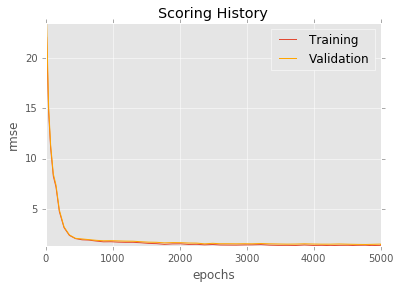

In [77]:
dl0.plot()

In [78]:
print 'train mse: ', dl0.mse(train=True)
print 'valid mse: ', dl0.mse(valid=True)

train mse:  1.82023543812
valid mse:  2.19038845744


In [79]:
# model = h2o.estimators.deeplearning(x=input_name, y='Y', training_frame=hdf_train, validation_frame=hdf_validate,
#                                     distribution="multinomial", activation="RectifierWithDropout", 
#                                     hidden=[10,10,10], input_dropout_ratio=0.2, l1=1e-5, epochs=10)


deeplearning prediction progress: |███████████████████████████████████████| 100%


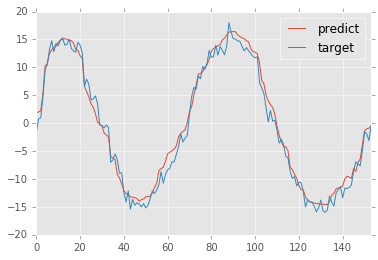

In [80]:
prediction= dl0.predict(hdf_validate)

prediction['target']=hdf_validate['Y']
output= prediction.as_data_frame()
output.plot()